In [11]:
from fipy import Variable, FaceVariable, CellVariable, Grid1D, \
NthOrderBoundaryCondition, ExplicitDiffusionTerm, TransientTerm, DiffusionTerm, Viewer,PowerLawConvectionTerm,ImplicitSourceTerm
from fipy.tools import numerix
from fipy import DefaultSolver
import numpy as np
import math

import numpy as np
import matplotlib.pyplot as plt
import torch
import math

In [12]:
def solution(x, t, m, A, B):
    return ((m*(x-A)**2)/(2*alpha*(m+2)*(B-t)))**(1./m)

In [13]:
def ic_func(x):
                  
    return solution(x, t0, m, A,B) # analytic Barenblatt at t0

In [14]:
L = 15.
T = 1.
nx = 1000

dx = 2*L/nx
dt = 0.5*dx**2
mesh = Grid1D(nx=nx, dx=dx) - [[L]]
A = 0
B = 1.01
alpha = 1
m = 3
t0 = 0.
valueLeft = 0
valueRight = 0
timeStepDuration = dt
steps = int(T/dt)+1
t_global = 0

In [15]:
x = mesh.cellCenters[0]
X = mesh.faceCenters 
IC = ic_func(x)
phi = CellVariable(name="solution variable",
                   mesh=mesh,
                   value=IC,
                   hasOld = True)



eqX = (TransientTerm(coeff = 1)
      == DiffusionTerm(coeff = phi**(m)) )

time_var = Variable(0.0)
phi.constrain(solution(-L,time_var,m,A,B),where=mesh.facesLeft)
phi.constrain(solution(L,time_var,m,A,B), where= mesh.facesRight) 


from builtins import range
solver = DefaultSolver()


In [16]:
U_fem = []
U_exact = []

for step in range(steps):
   
    
    
    
    
    U_fem.append(np.array(phi))
    
    npx = torch.from_numpy(np.array(x))
    
    U_exact.append(solution(npx,t0+timeStepDuration*step,m,A,B))
    phi.updateOld()
    eqX.solve(var=phi,
              dt=timeStepDuration,
              solver = solver)
    t_global+=dt
    time_var.setValue(t_global)
    

In [17]:
U_exact = np.array(U_exact)
U_fem = np.array(U_fem)

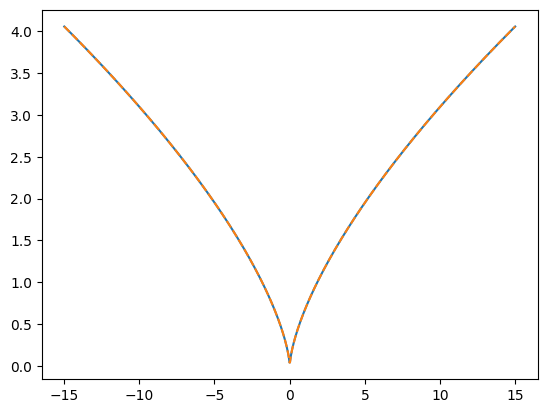

In [18]:
plt.plot(np.array(x), U_fem[1])
plt.plot(np.array(x), U_exact[1], linestyle = '--')

0.0002504782578555504
0.2716236331707229


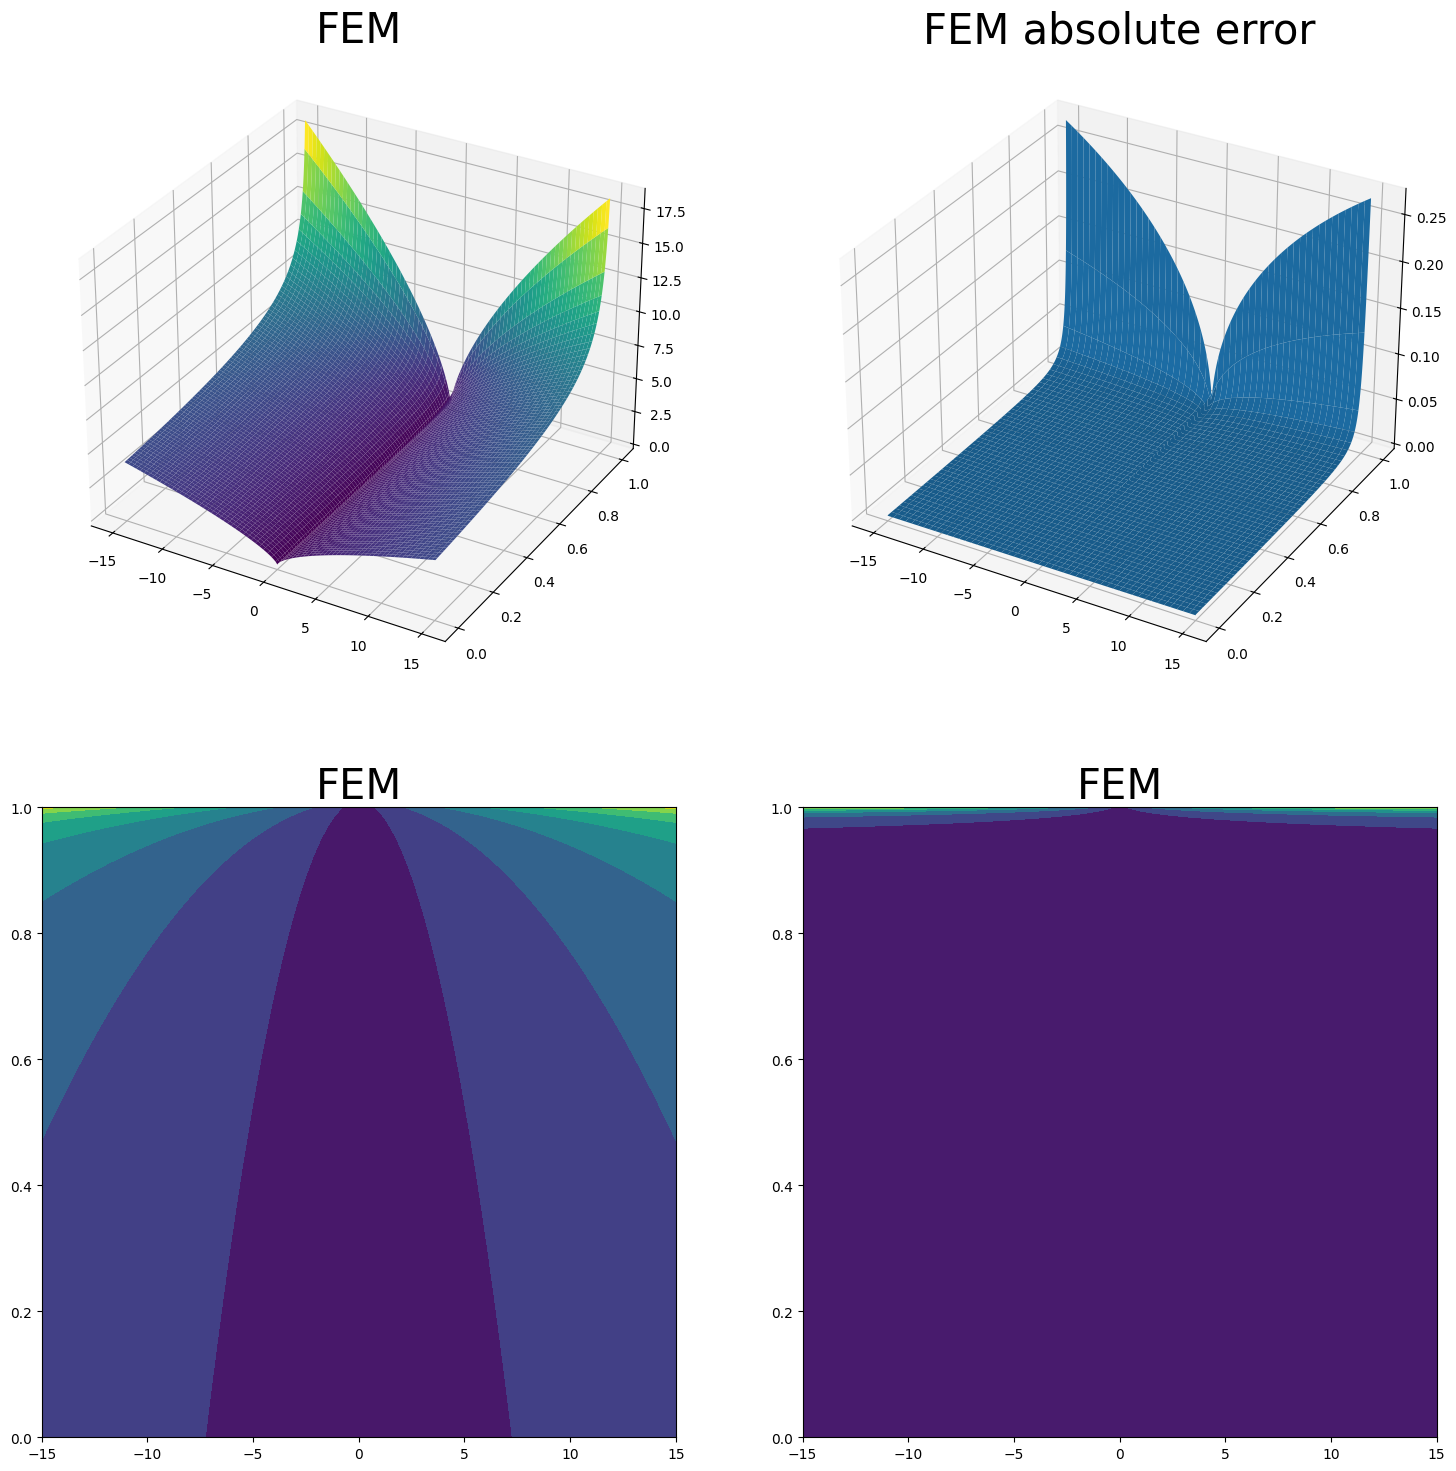

In [20]:
import matplotlib.pyplot as plt
Ts = np.linspace(0,T,steps)
Xs = np.linspace(-L,L,nx)
XX,TT = np.meshgrid(Xs,Ts)
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(2,2,1, projection = '3d')

ax.plot_surface(XX,TT,U_fem,rcount=80, ccount=80, cmap="viridis", edgecolor="none")
ax.set_title('FEM', fontsize = 30)
ax = fig.add_subplot(2,2,2, projection = '3d')

ax.set_title('FEM absolute error', fontsize = 30)
ax.plot_surface(XX,TT,np.abs(U_fem - U_exact))
print(np.mean(np.mean((U_fem - U_exact)**2)))
print(np.max(np.abs(U_fem - U_exact)))
ax = fig.add_subplot(2,2,3)

ax.set_title('FEM', fontsize = 30)
ax.contourf(XX,TT,U_fem)


ax = fig.add_subplot(2,2,4)

ax.set_title('FEM', fontsize = 30)
ax.contourf(XX,TT,np.abs(U_fem - U_exact))
